In [0]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

covid_19_india_url="covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, index_col="Date", parse_dates=True)

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-in-india.zip
replace AgeGroupDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
covid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, index_col="Date", parse_dates=True)
"""

'\ncovid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"\ncovid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, index_col="Date", parse_dates=True)\n'

In [0]:
covid_19_india.tail()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-05-06,1667,8:00 AM,Telengana,-,-,585,29,1096
2020-05-06,1668,8:00 AM,Tripura,-,-,2,0,43
2020-05-06,1669,8:00 AM,Uttarakhand,-,-,39,1,61
2020-05-06,1670,8:00 AM,Uttar Pradesh,-,-,987,56,2880
2020-05-06,1671,8:00 AM,West Bengal,-,-,364,140,1344


In [0]:
#Computing net cases for the country
march_first=pd.to_datetime('01/03/2020',format='%d/%m/%Y')
april_tenth=pd.to_datetime('10/04/2020',format='%d/%m/%Y')
india_data=covid_19_india.loc[(covid_19_india.index>=march_first) & (covid_19_india.index<=april_tenth)].groupby("Date").agg({'Confirmed':'sum', 'Cured':'sum', 'Deaths':'sum'})
india_data.tail()

,Confirmed,Cured,Deaths
Date,,,
2020-04-06,4281,319,111
2020-04-07,4789,353,124
2020-04-08,5274,411,149
2020-04-09,5865,478,169
2020-04-10,6761,516,206


In [0]:
#Computing active number of cases
india_data["Active"]=india_data["Confirmed"]-india_data["Deaths"]-india_data["Cured"]
india_data.tail()

,Confirmed,Cured,Deaths,Active
Date,,,,
2020-04-06,4281,319,111,3851
2020-04-07,4789,353,124,4312
2020-04-08,5274,411,149,4714
2020-04-09,5865,478,169,5218
2020-04-10,6761,516,206,6039


Text(0, 0.5, 'No. of Cases')

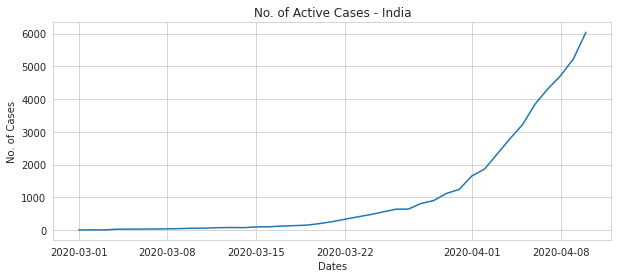

In [0]:
#Plotting a line graph of number of cases
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize = (10,4))  
sns.lineplot(data=india_data["Active"])
plt.title("No. of Active Cases - India")
plt.xlabel("Dates")
plt.ylabel("No. of Cases")

Text(0, 0.5, 'No. of Cases')

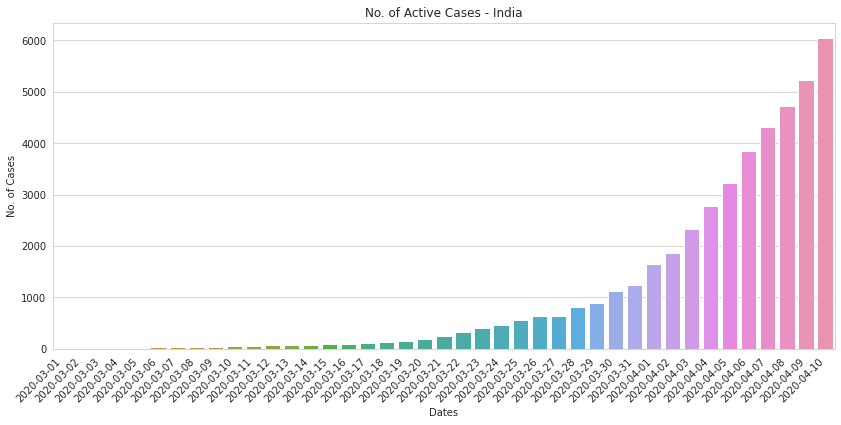

In [0]:
#Plotting a bar plot of number of cases
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize = (14,6))  
sns.barplot(y=india_data["Active"], x=india_data.index)
x_dates = india_data.index.strftime('%Y-%m-%d').sort_values().unique()
ax2.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.title("No. of Active Cases - India")
plt.xlabel("Dates")
plt.ylabel("No. of Cases")